# Hoja de Trabajo 3

#### Mineria de Datos
#### Maria Marta Ramirez Gil - 21342
#### Gustavo Andres Gonzalez - 21438

-------------------------------------------------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar los datos
data = pd.read_csv('medicina.csv')

## EDA

In [3]:
# Explorar las primeras filas de los datos
print("Primeras filas de los datos:")
print(data.head())

# Información general sobre el conjunto de datos
print("\nInformación general sobre el conjunto de datos:")
print(data.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())

# Verificar si hay valores nulos o faltantes
print("\nValores nulos o faltantes:")
print(data.isnull().sum())

Primeras filas de los datos:
   Age Sex      BP Cholesterol  Na_to_K   Drug      Height      Weight  \
0   23   F    HIGH        HIGH   25.355  drugY  167.494363  107.766413   
1   47   M     LOW        HIGH   13.093  drugC  171.866737   43.332084   
2   47   M     LOW        HIGH   10.114  drugC  178.318211   72.814734   
3   28   F  NORMAL        HIGH    7.798  drugX  180.900052   56.813694   
4   61   F     LOW        HIGH   18.043  drugY  167.937282   81.902153   

   Exercise  HealthyEating  
0       0.0            0.0  
1       1.0            0.0  
2       1.0            1.0  
3       1.0            0.0  
4       1.0            0.0  

Información general sobre el conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            500 non-null    int64  
 1   Sex            500 non-null    object 
 2   BP             50

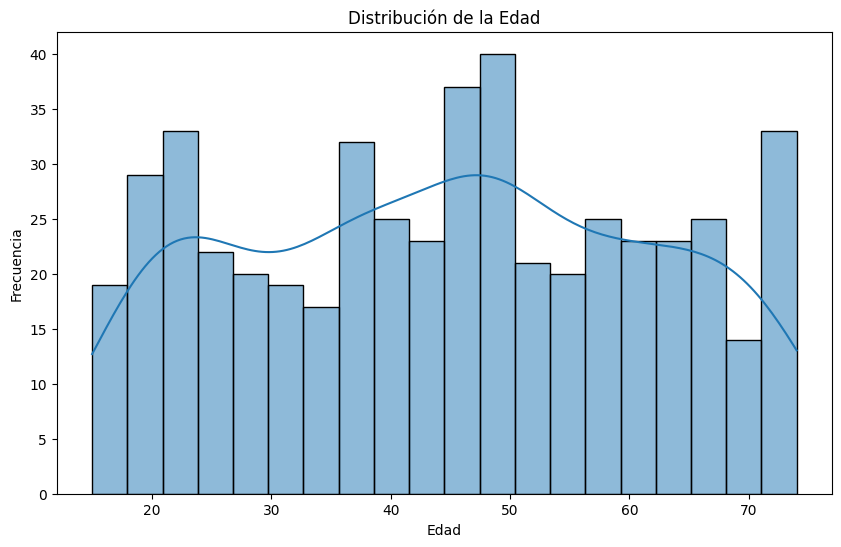

Estadísticas de la Edad:
count    500.000000
mean      44.610000
std       17.004005
min       15.000000
25%       30.750000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64


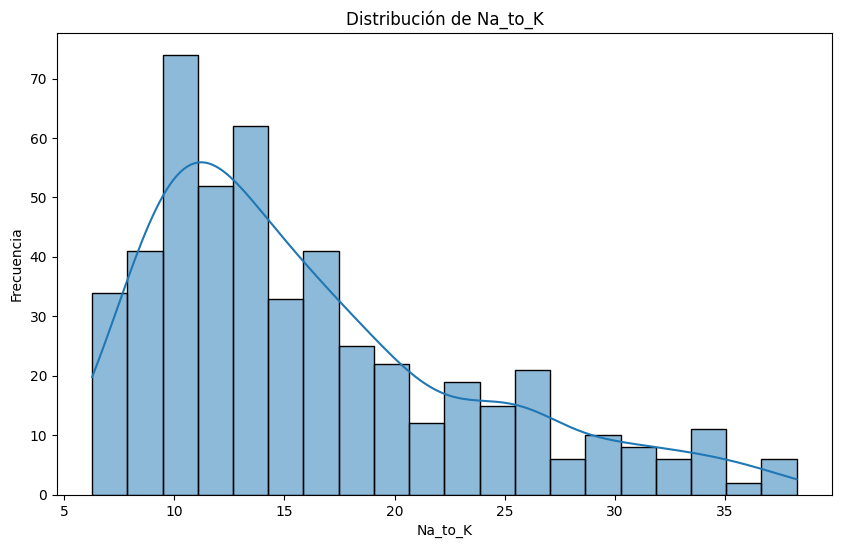


Estadísticas de Na_to_K:
count    500.000000
mean      16.151824
std        7.332291
min        6.269000
25%       10.514250
50%       13.972000
75%       19.480750
max       38.247000
Name: Na_to_K, dtype: float64


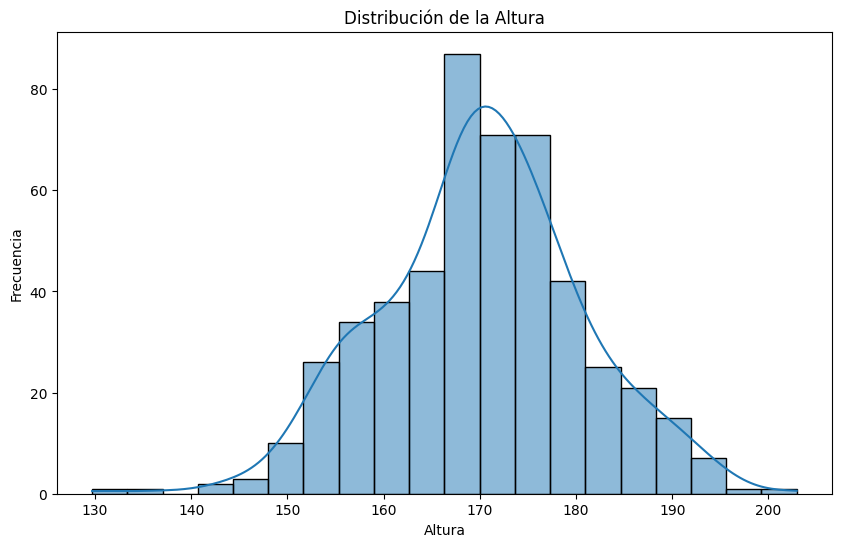


Estadísticas de la Altura:
count    500.000000
mean     170.109039
std       10.496840
min      129.691685
25%      163.539613
50%      170.192129
75%      176.798684
max      202.933444
Name: Height, dtype: float64


In [7]:
# Visualización de la distribución de las variables numéricas
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribución de la Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()
print("Estadísticas de la Edad:")
print(data['Age'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data['Na_to_K'], bins=20, kde=True)
plt.title('Distribución de Na_to_K')
plt.xlabel('Na_to_K')
plt.ylabel('Frecuencia')
plt.show()
print("\nEstadísticas de Na_to_K:")
print(data['Na_to_K'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data['Height'], bins=20, kde=True)
plt.title('Distribución de la Altura')
plt.xlabel('Altura')
plt.ylabel('Frecuencia')
plt.show()
print("\nEstadísticas de la Altura:")
print(data['Height'].describe())

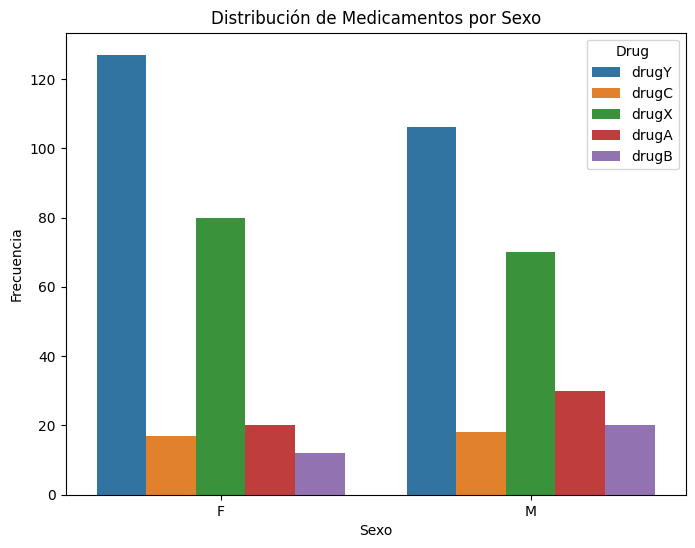

Distribución de Medicamentos por Sexo:
Sex
F    256
M    244
Name: count, dtype: int64


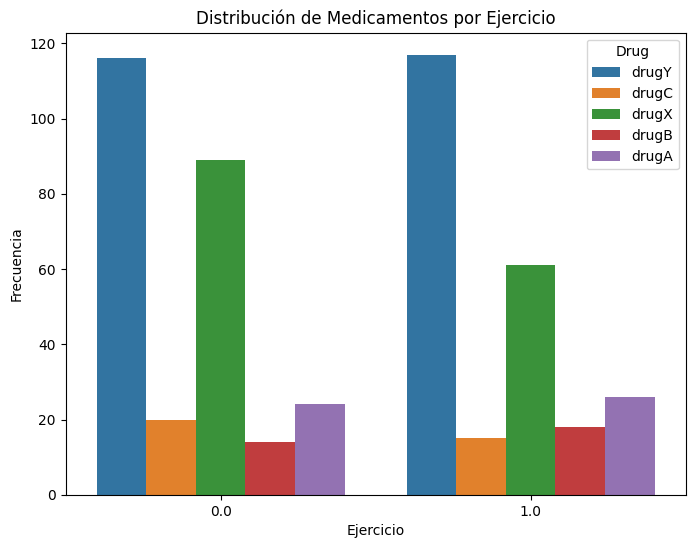


Distribución de Medicamentos por Ejercicio:
Exercise
0.0    263
1.0    237
Name: count, dtype: int64


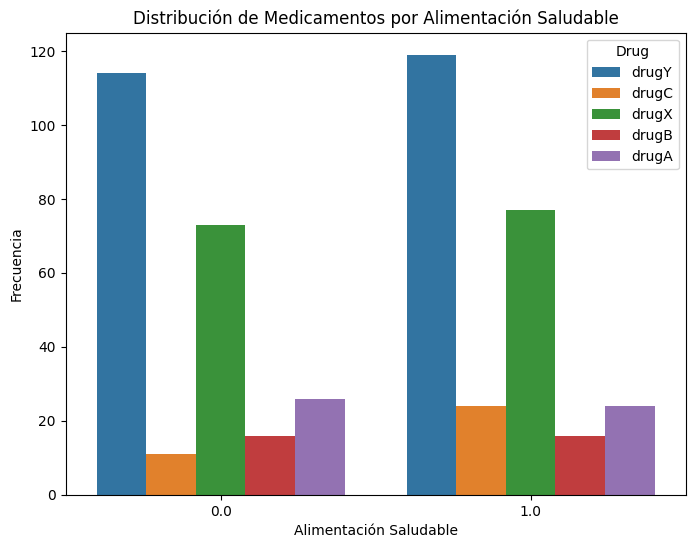


Distribución de Medicamentos por Alimentación Saludable:
HealthyEating
1.0    260
0.0    240
Name: count, dtype: int64


In [8]:
# Visualización de la distribución de las variables categóricas
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', data=data, hue='Drug')
plt.title('Distribución de Medicamentos por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()
print("Distribución de Medicamentos por Sexo:")
print(data['Sex'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='Exercise', data=data, hue='Drug')
plt.title('Distribución de Medicamentos por Ejercicio')
plt.xlabel('Ejercicio')
plt.ylabel('Frecuencia')
plt.show()
print("\nDistribución de Medicamentos por Ejercicio:")
print(data['Exercise'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='HealthyEating', data=data, hue='Drug')
plt.title('Distribución de Medicamentos por Alimentación Saludable')
plt.xlabel('Alimentación Saludable')
plt.ylabel('Frecuencia')
plt.show()
print("\nDistribución de Medicamentos por Alimentación Saludable:")
print(data['HealthyEating'].value_counts())


In [40]:
from sklearn.preprocessing import MinMaxScaler

# Copiar el DataFrame original para evitar modificar los datos originales
processed_data = data.copy()

# Encoding para la columna 'Sex'
sex_mapping = {'F': 1, 'M': 0}
processed_data['Sex'] = processed_data['Sex'].map(sex_mapping)

# Encoding para la columna 'BP' usando one-hot encoding
bp_encoded = pd.get_dummies(processed_data['BP'], prefix='BP')
processed_data = pd.concat([processed_data, bp_encoded], axis=1)
processed_data.drop('BP', axis=1, inplace=True)

# Encoding para la columna 'Cholesterol'
cholesterol_mapping = {'HIGH': 1, 'NORMAL': 0}
processed_data['Cholesterol'] = processed_data['Cholesterol'].map(cholesterol_mapping)

# Encoding para la columna 'Drug' usando one-hot encoding
drug_encoded = pd.get_dummies(processed_data['Drug'], prefix='Drug')
processed_data = pd.concat([processed_data, drug_encoded], axis=1)
processed_data.drop('Drug', axis=1, inplace=True)

# Convertir las columnas binarias en valores numéricos
for column in processed_data.columns:
    if 'BP_' in column or 'Drug_' in column:
        processed_data[column] = processed_data[column].astype(int)

# Normalizar las características numéricas (Age, Na_to_K, Height, Weight)
scaler = MinMaxScaler()
columns_to_normalize = ['Age', 'Na_to_K', 'Height', 'Weight']
processed_data[columns_to_normalize] = scaler.fit_transform(processed_data[columns_to_normalize])

# Verificar los primeros registros del DataFrame procesado
print(processed_data.head())

# Guardar el DataFrame procesado en un archivo CSV
processed_data.to_csv('datos_medicos_procesados.csv', index=False)

        Age  Sex  Cholesterol   Na_to_K    Height    Weight  Exercise  \
0  0.135593    1            1  0.596848  0.516136  0.932136       0.0   
1  0.542373    0            1  0.213397  0.575833  0.155031       1.0   
2  0.542373    0            1  0.120239  0.663918  0.510604       1.0   
3  0.220339    1            1  0.047814  0.699169  0.317625       1.0   
4  0.779661    1            1  0.368191  0.522183  0.620202       1.0   

   HealthyEating  BP_HIGH  BP_LOW  BP_NORMAL  Drug_drugA  Drug_drugB  \
0            0.0        1       0          0           0           0   
1            0.0        0       1          0           0           0   
2            1.0        0       1          0           0           0   
3            0.0        0       0          1           0           0   
4            0.0        0       1          0           0           0   

   Drug_drugC  Drug_drugX  Drug_drugY  
0           0           0           1  
1           1           0           0  
2       

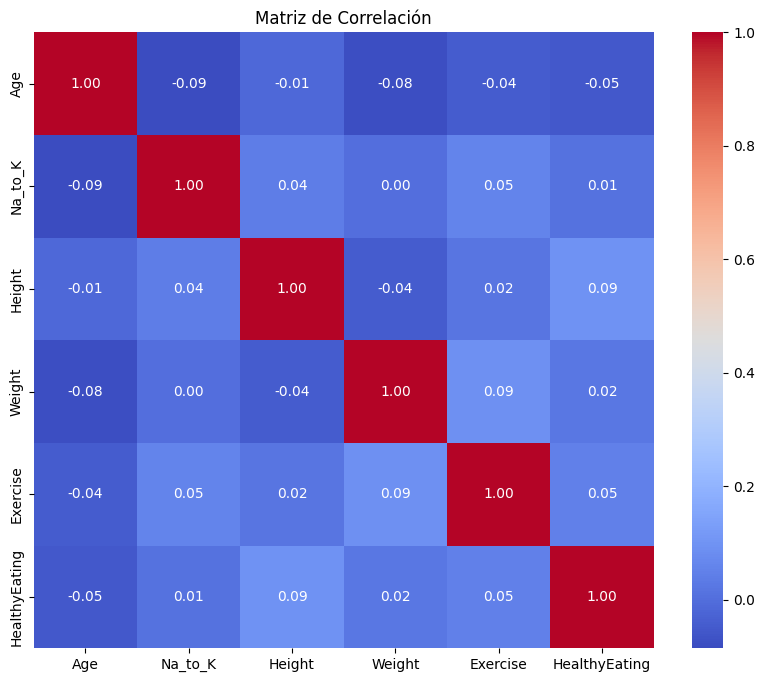

In [10]:
# Seleccionar solo las variables numéricas
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlación entre las variables numéricas
plt.figure(figsize=(10, 8))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()


### Informe EDA

Distribución de la Edad:
- La edad de los pacientes oscila entre 15 y 74 años, con una media de aproximadamente 45 años.
- La mayoría de los pacientes tienen entre 30 y 60 años, como lo indica el rango intercuartil.
- La edad parece estar distribuida de manera relativamente uniforme, sin sesgo evidente.

Distribución de Na_to_K:
- El ratio de Na_to_K varía entre 6.269 y 38.247, con una media de aproximadamente 16.15.
- La distribución de Na_to_K muestra una dispersión considerable, con algunos valores extremos en el lado superior.

Distribución de la Altura:
- La altura de los pacientes varía entre 129.69 y 202.93 centímetros, con una media de alrededor de 170.11.
- La distribución de la altura parece seguir una distribución normal, con la mayoría de los pacientes teniendo alturas cercanas a la media.

Distribución de Medicamentos por Sexo:
- Hay 256 pacientes femeninas y 244 pacientes masculinos en el conjunto de datos.
- La diferencia en la distribución de medicamentos entre hombres y mujeres podría ser un factor importante en la predicción de qué medicamento sería más efectivo para cada grupo.

Distribución de Medicamentos por Ejercicio:
- Hay 263 pacientes que no hacen ejercicio y 237 que sí lo hacen.
- La relación entre el ejercicio y la eficacia del medicamento podría ser una variable significativa en el modelo de predicción.

Distribución de Medicamentos por Alimentación Saludable:
- Hay 260 pacientes que tienen una alimentación saludable y 240 que no la tienen.
- La relación entre la alimentación saludable y la eficacia del medicamento también podría influir en el resultado del tratamiento.


## Clustering

In [45]:
processed_data.head()

,Age,Sex,Cholesterol,Na_to_K,Height,Weight,Exercise,HealthyEating,BP_HIGH,BP_LOW,BP_NORMAL,Drug_drugA,Drug_drugB,Drug_drugC,Drug_drugX,Drug_drugY,Cluster
0,0.135593,1,1,0.596848,0.516136,0.932136,0.0,0.0,1,0,0,0,0,0,0,1,1
1,0.542373,0,1,0.213397,0.575833,0.155031,1.0,0.0,0,1,0,0,0,1,0,0,0
2,0.542373,0,1,0.120239,0.663918,0.510604,1.0,1.0,0,1,0,0,0,1,0,0,0
3,0.220339,1,1,0.047814,0.699169,0.317625,1.0,0.0,0,0,1,0,0,0,1,0,2
4,0.779661,1,1,0.368191,0.522183,0.620202,1.0,0.0,0,1,0,0,0,0,0,1,1


Puntuación de silueta promedio: 0.21157701928982925

Centroides de los clusters:
        Age       Sex  Cholesterol   Na_to_K    Height    Weight  Exercise  \
0  0.462906  0.540984     0.497268  0.363882  0.553876  0.484040  0.519126   
1  0.553537  0.455090     0.455090  0.312868  0.549819  0.464082  0.473054   
2  0.491864  0.540000     0.573333  0.237907  0.551588  0.487073  0.420000   

   HealthyEating       BP_HIGH        BP_LOW     BP_NORMAL  
0       0.502732  1.000000e+00  4.440892e-16 -3.330669e-16  
1       0.538922 -4.996004e-16  1.000000e+00 -2.775558e-16  
2       0.520000 -4.440892e-16  4.996004e-16  1.000000e+00  


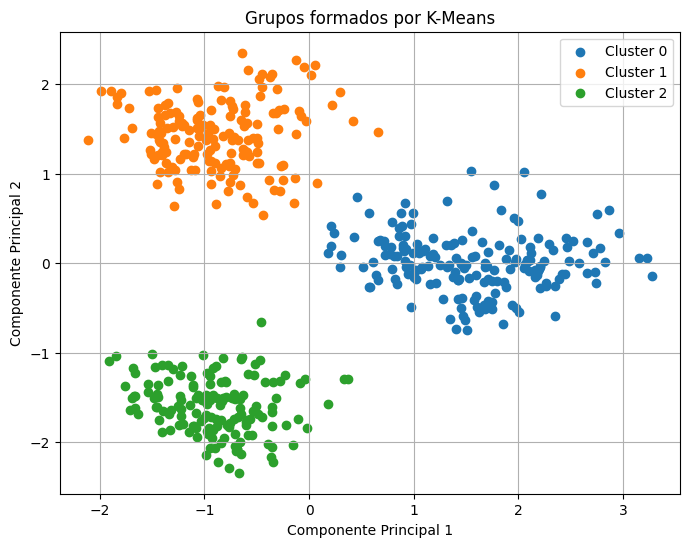

In [54]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 2. Cargar y preprocesar los datos
data = pd.read_csv('datos_medicos_procesados.csv')  # Asegúrate de poner la ruta correcta del archivo
X = data.drop(['Drug_drugA', 'Drug_drugB', 'Drug_drugC', 'Drug_drugX', 'Drug_drugY'], axis=1)  # Excluir las columnas de los medicamentos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Realizar el clustering utilizando K-Means con 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. Evaluar el rendimiento del clustering
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print("Puntuación de silueta promedio:", silhouette_avg)

# Mostrar los centroides de los clusters
centroides = scaler.inverse_transform(kmeans.cluster_centers_)
centroides_df = pd.DataFrame(centroides, columns=X.columns)
print("\nCentroides de los clusters:")
print(centroides_df)


# Reducir la dimensionalidad de los datos a 2 dimensiones utilizando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Graficar los grupos formados por K-Means
plt.figure(figsize=(8, 6))
for cluster in range(3):  # Cambiar el rango a 3 ya que ahora solo hay 3 clusters
    plt.scatter(X_pca[data['Cluster'] == cluster, 0], X_pca[data['Cluster'] == cluster, 1], label=f'Cluster {cluster}')
plt.title('Grupos formados por K-Means')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()